<a href="https://colab.research.google.com/github/dreteles/STEAM_ANALYSIS/blob/main/ANDRETELES_FASE2_PROG_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

#CARREGA O DATASET
df = pd.read_csv('steam_games.csv')


In [4]:
#VERIFICANDO NOME DAS COLUNAS DO DATASET
print(df.columns)

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


PERGUNTA 1. Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? No caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (do mais velho para o mais recente).

In [5]:
# CONVERTE PARA NUMÉRICOS E REMOVE NULOS
df['Metacritic score'] = pd.to_numeric(df['Metacritic score'], errors='coerce')
df = df.dropna(subset=['Metacritic score'])

# REMOVE JOGOS REPETIDOS COM BASE NO NOME
df = df.drop_duplicates(subset='Name')

# FILTRA E ORDENA OS 10 JOGOS MAIS BEM AVALIADOS PELO METACRITIC
top_10_metacritic = df.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True]).head(10)

# EXIBE RESULTADOS
print(top_10_metacritic[['Name', 'Metacritic score', 'Release date']])

                                Name  Metacritic score  Release date
45752  Disco Elysium - The Final Cut                97  Oct 15, 2019
64935                Persona 5 Royal                97  Oct 20, 2022
57205             Grand Theft Auto V                96  Apr 13, 2015
32406                      BioShock™                96  Aug 21, 2007
36775                    Half-Life 2                96  Nov 16, 2004
49557                      Half-Life                96   Nov 8, 1998
28170                       Portal 2                95  Apr 18, 2011
37184                          QUAKE                94   Aug 3, 2007
32756                     ELDEN RING                94  Feb 24, 2022
14018           Mass Effect 2 (2010)                94  Jan 26, 2010


PERGUNTA 2. Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)?  

In [6]:
#CARREGA O DATASET
df = pd.read_csv('steam_games.csv')

#CONVERTE COLUNAS PARA NUMÉRICO
df['Screenshots'] = pd.to_numeric(df['Screenshots'], errors='coerce').fillna(0)
df['Movies'] = pd.to_numeric(df['Movies'], errors='coerce').fillna(0)

#VERIFICA QUANTOS JOGOS TEM DADOS EM "SCREENSHOTS" OU "MOVIES" (NÃO ZERO)
num_com_screenshot_ou_movie = ((df['Screenshots'] > 0) | (df['Movies'] > 0)).sum()
print("=========================VERIFICAÇÕES====================================")

print(f"\nNúmero de jogos com pelo menos uma captura de tela ou filme: {num_com_screenshot_ou_movie}")
print(f"Total de jogos: {len(df)}")

#VERIFICANDO DISTRIBUIÇÃO DOS VALORES DE SCREESHOTS
print("\nDistribuição de Screenshots (mostrando os primeiros 10 valores):")
print(df['Screenshots'].head(10).values)

#VERIFICANDO DISTRIBUIÇÃO DOS VALORES DE MOVIES
print("\nDistribuição de Movies (mostrando os primeiros 10 valores):")
print(df['Movies'].head(10).values)

#CALCULANDO AS ESTATÍSTICAS
media_dlcs = df['DLC count'].mean()
max_dlcs = df['DLC count'].max()
media_pos = df['Positive'].mean()
max_pos = df['Positive'].max()
media_neg = df['Negative'].mean()
max_neg = df['Negative'].max()

#CALCULA MATERIAIS DE DEMONSTRAÇÃO (SCREENSHOTS + MOVIES)
df['Materials'] = df['Screenshots'] + df['Movies']
media_materials = df['Materials'].mean()
max_materials = df['Materials'].max()
print("========================================================================")

#EXIBE RESULTADOS
print("\nResultados:")
print(f"Média de DLCs: {media_dlcs:.2f}")
print(f"Máximo de DLCs: {max_dlcs:.2f}")
print(f"Média de avaliações positivas: {media_pos:.2f}")
print(f"Máximo de avaliações positivas: {max_pos:.2f}")
print(f"Média de avaliações negativas: {media_neg:.2f}")
print(f"Máximo de avaliações negativas: {max_neg:.2f}")
print(f"Média de materiais de demonstração (capturas de tela + filmes): {media_materials:.2f}")
print(f"Máximo de materiais de demonstração (capturas de tela + filmes): {max_materials:.2f}")


=========================VERIFICAÇÕES====================================

Número de jogos com pelo menos uma captura de tela ou filme: 0
Total de jogos: 72934

Distribuição de Screenshots (mostrando os primeiros 10 valores):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Distribuição de Movies (mostrando os primeiros 10 valores):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Resultados:
Média de DLCs: 0.61
Máximo de DLCs: 2366.00
Média de avaliações positivas: 1096.73
Máximo de avaliações positivas: 5764420.00
Média de avaliações negativas: 179.29
Máximo de avaliações negativas: 895978.00
Média de materiais de demonstração (capturas de tela + filmes): 0.00
Máximo de materiais de demonstração (capturas de tela + filmes): 0.00


Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?  

In [7]:
#FILTRA JOGOS PAGOS
df_paid = df[df['Price'] > 0]

#CONTA NÚMERO DE JOGOS POR EMPRESA
publisher_game_count = df_paid['Publishers'].value_counts()

#SELECIONA AS 5 EMPRESAS COM MAIS JOGOS PAGOS
top_5_publishers = publisher_game_count.head(5)

#EXIBE RESULTADOS
print("\nTop 5 empresas que mais publicam jogos pagos:\n")
print(top_5_publishers.to_string())

#FITRA OS JOGOS PAGOS DAS 5 EMPRESAS
top_5_publishers_games = df_paid[df_paid['Publishers'].isin(top_5_publishers.index)]

#CALCULA A MEDIA E A MEDIANA DAS AVALIAÇÕES POSITIVAS
avg_reviews_positive = top_5_publishers_games.groupby('Publishers')['Positive'].mean()
median_reviews_positive = top_5_publishers_games.groupby('Publishers')['Positive'].median()

#EXIBE A MÉDIA E MEDIANA DAS AVALIAÇÕES POSIIVAS
print("\nNúmero MÉDIO de avaliações positivas para as 5 empresas com mais jogos pagos:\n")
print(avg_reviews_positive.round(2).to_string())
print("\nNúmero MEDIANO de avaliações positivas para as 5 empresas com mais jogos pagos:\n")
print(median_reviews_positive.round(2).to_string())



Top 5 empresas que mais publicam jogos pagos:

Publishers
Big Fish Games    443
8floor            239
Strategy First    162
Laush Studio      157
HH-Games          156

Número MÉDIO de avaliações positivas para as 5 empresas com mais jogos pagos:

Publishers
8floor              4.46
Big Fish Games      7.36
HH-Games           10.54
Laush Studio       19.78
Strategy First    276.45

Número MEDIANO de avaliações positivas para as 5 empresas com mais jogos pagos:

Publishers
8floor             3.0
Big Fish Games     5.0
HH-Games           9.0
Laush Studio      12.0
Strategy First    23.0


Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

In [8]:
#FILTRA OS JOGOS QUE SUPORTAM O LINUX
df_linux = df[df['Linux'] == 1]  #CONSIDERA QUE 1 INDICA QUE O JOGO SUPORTA LINUX

#FILTRA OS JOGOS POR ANO (2018 E 2022)
df_linux_2018 = df_linux[df_linux['Release date'].str.contains('2018')]
df_linux_2022 = df_linux[df_linux['Release date'].str.contains('2022')]

#CONTA O NÚMERO DE JOGOS POR ANO
num_linux_2018 = df_linux_2018.shape[0]
num_linux_2022 = df_linux_2022.shape[0]

#EXIBE RESULTADOS
print(f"Número de jogos que suportam Linux em 2018: {num_linux_2018}")
print(f"Número de jogos que suportam Linux em 2022: {num_linux_2022}\n")

#COMPARA E EXIBE RESULTADOS
if num_linux_2022 > num_linux_2018:
    print("O número de jogos que suportam Linux cresceu entre 2018 e 2022.")
else:
    print("O número de jogos que suportam Linux não cresceu entre 2018 e 2022.")


Número de jogos que suportam Linux em 2018: 1190
Número de jogos que suportam Linux em 2022: 1311

O número de jogos que suportam Linux cresceu entre 2018 e 2022.


Gráfico 1: Percentual de jogos que possuem suporte para cada sistema operacional. Caso um jogo suporte múltiplos sistemas operacionais, contar um “voto” para cada sistema operacional suportado.

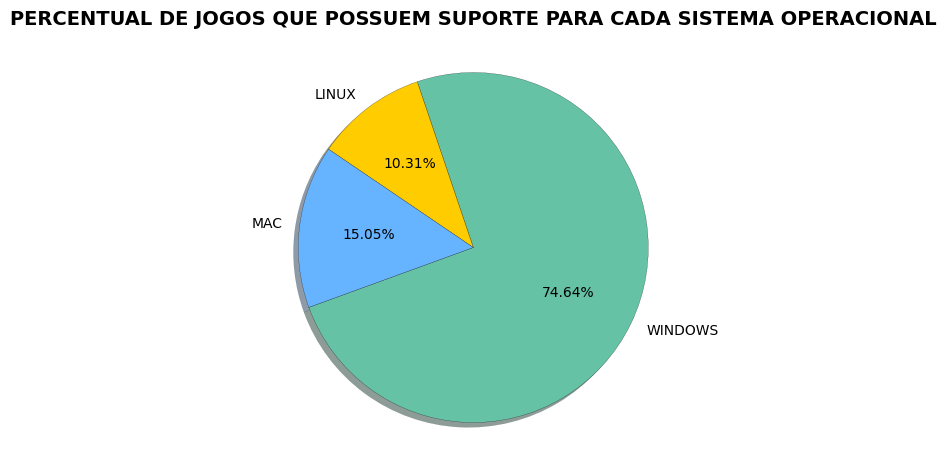

In [9]:
import matplotlib.pyplot as plt


#CONTA O NÚMERO DE JOGOS QUE SUPORTA CADA SISTEMA OPERACIONALl
suporte_so = {
    'WINDOWS': df['Windows'].sum(),
    'LINUX': df['Linux'].sum(),
    'MAC': df['Mac'].sum()
}

#CORES (VERDE, AMARELO, AZUL)
cores_verde_amarelo_azul = ['#66c2a5', '#ffcc00', '#66b3ff']

#CRIA GRÁFICO
fig, ax = plt.subplots(figsize=(11, 5))  #AUMENTA O TAMANHO DA IMAGEM
ax.pie(suporte_so.values(), labels=suporte_so.keys(), autopct='%2.2f%%', startangle=200,
       colors=cores_verde_amarelo_azul, wedgeprops={'edgecolor': 'black', 'linewidth': 0.15}, shadow=True) # MUDA COR DA BORDA, MUDA ESPESSURA DA LINHA E ACRESCENTA SOMBRA

#TÍTULO EM NEGRITO COM FONTE PRETA E TAMANHO 14
ax.set_title('PERCENTUAL DE JOGOS QUE POSSUEM SUPORTE PARA CADA SISTEMA OPERACIONAL\n',
             fontsize=14, color='black', fontweight='bold')

#GARANTE QUE O GRÁFICO SEJA CIRCULAR
plt.axis('equal')

#EXIBE O GRÁFICO
plt.show()


Gráfico 2: Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020 (mostrar tendência para cada gênero separadamente, mas no mesmo gráfico).  

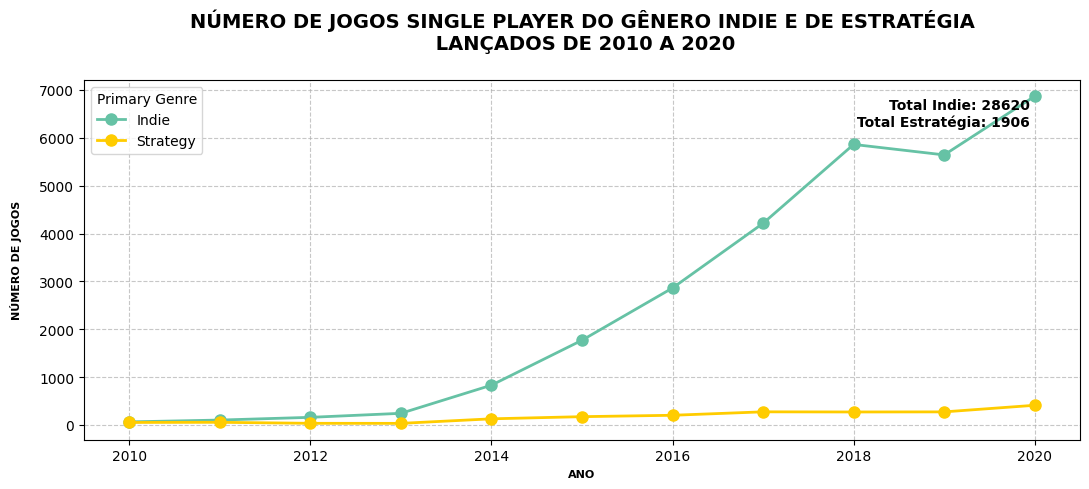

In [10]:
#CARREGA O DATASET E FILTRA OS JOGOS LANÇADOS ENTRE 2010 E 2020
df = pd.read_csv('steam_games.csv')
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df = df[df['Release date'].dt.year.between(2010, 2020)]

#FILTRA OS JOGOS SIMGLE PLAYER (CONSIDERA SINGLE PLAYER TODOS O QUE NÃO SÃO MULTIPLAYER)
df_singleplayer = df[~df['Categories'].str.contains('multiplayer', case=False, na=False)].copy()
#CLASSIFICA COMO INDIE OU ESTRATÉGIA
df_singleplayer['Primary Genre'] = df_singleplayer['Genres'].apply(
    lambda x: 'Indie' if 'Indie' in str(x) else ('Strategy' if 'Strategy' in str(x) else None)
)

#CRIA COLUNA YEAR COM O ANO DE LANÇAMENTO
df_singleplayer['Year'] = df_singleplayer['Release date'].dt.year

#REMOVE JOGOS SEM GÊNERO INDIE OU STRATEGY
df_singleplayer = df_singleplayer.dropna(subset=['Primary Genre'])

#CONTA JOGOS INDIE E STRATEGY POR ANO
indie_count = df_singleplayer['Primary Genre'].value_counts().get('Indie', 0)
strategy_count = df_singleplayer['Primary Genre'].value_counts().get('Strategy', 0)
jogos_por_ano = df_singleplayer.groupby(['Year', 'Primary Genre']).size().unstack(fill_value=0)

#CRIA GRÁFICO DE LINHA COM AS CORES VERDE E AMARELO
cores = ['#66c2a5', '#ffcc00']
ax = jogos_por_ano.plot(kind='line', marker='o', color=cores, figsize=(11, 5), linewidth=2, markersize=8) #DEFINE TIPO LINHA, FORMATO DO MARCADOR, POLEGADAS, ESPESSURA DA LINHA E TAMANHO DO MARCADOR

#ADICIONA TÍTULO EM NEGRITO COM FONTE TAMANHO 14
ax.set_title('NÚMERO DE JOGOS SINGLE PLAYER DO GÊNERO INDIE E DE ESTRATÉGIA\n LANÇADOS DE 2010 A 2020\n', fontsize=14, fontweight='bold')
ax.set_xlabel('ANO', fontsize=8, fontweight='bold')
ax.set_ylabel('NÚMERO DE JOGOS\n', fontsize=8, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7) #ADICIONA GRADE TRACEJADA COM OPACIDADE EM 0.7

#ADICIONA TEXTO COM QUANTIDADE TOTAL DE JOGOS POR GÊNERO
plt.text(0.95, 0.95, f'Total Indie: {indie_count}\n Total Estratégia: {strategy_count}', ha='right', va='top', transform=ax.transAxes, fontsize=10, fontweight='bold')

#EXIBE GRÁFICO
plt.tight_layout()
plt.show()

PERGUNTA INDIVIDUAL:
Qual o preço médio dos jogos por cada sistema operacional?

In [11]:
# CARREGA O DATASET
df = pd.read_csv('steam_games.csv')

# LIMPA E PREPARA OS DADOS
df['Linux'] = df['Linux'].fillna(0).astype(int)
df['Mac'] = df['Mac'].fillna(0).astype(int)
df['Windows'] = df['Windows'].fillna(0).astype(int)
df['Price'] = df['Price'].fillna(0)

# FILTRA OS JOGOS PARA LINUX, MAC E WINDOWS
df_linux = df[df['Linux'] == 1]
df_mac = df[df['Mac'] == 1]
df_windows = df[df['Windows'] == 1]

# CALCULA O PREÇO MÉDIO DOS JOGOS POR PLATAFORMA
mean_price_linux = df_linux['Price'].mean()
mean_price_mac = df_mac['Price'].mean()
mean_price_windows = df_windows['Price'].mean()

# EXIBE OS RESULTADOS
print(f"Preço médio dos jogos para Linux: ${mean_price_linux:.2f}")
print(f"Preço médio dos jogos para Mac: ${mean_price_mac:.2f}")
print(f"Preço médio dos jogos para Windows: ${mean_price_windows:.2f}")




Preço médio dos jogos para Linux: $7.56
Preço médio dos jogos para Mac: $7.75
Preço médio dos jogos para Windows: $7.22


Gráfico 3: UM gráfico que explore outros aspectos dos dados coletados.
Como foi a variação do preço médio dos jogos para Linux evoluiu de janeiro de 2018 a dezembro de 2020?

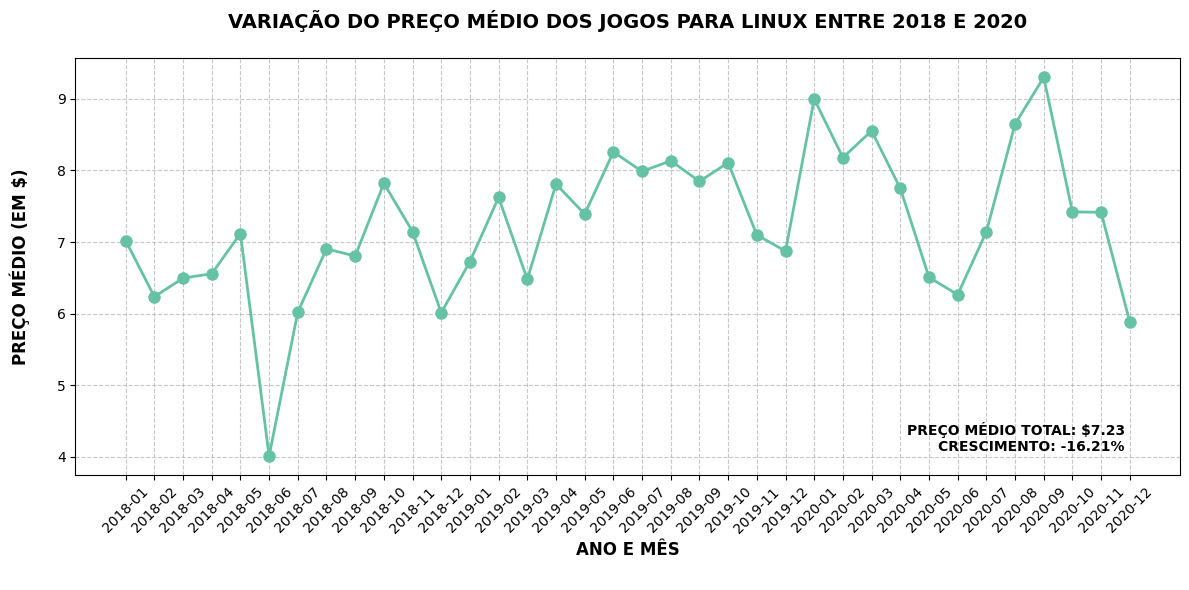

In [ ]:
# CALCULA O PREÇO MÉDIO NO INÍCIO (JANEIRO DE 2018) E NO FINAL (DEZEMBRO DE 2020)
preco_inicial = preco_medio_linux_por_mes.loc[(2018, 1)]
preco_final = preco_medio_linux_por_mes.loc[(2020, 12)]

# CALCULA O CRESCIMENTO PERCENTUAL
crescimento_percentual = ((preco_final - preco_inicial) / preco_inicial) * 100

# CRIA GRÁFICO E DEFINE A COR
plt.figure(figsize=(12, 6))
cores = ['#66c2a5']
ax = preco_medio_linux_por_mes.plot(kind='line', marker='o', color=cores, figsize=(12, 6), linewidth=2, markersize=8)

# DEFINE TÍTULOS, RÓTULOS E CONFIGURAÇÕES DE ESTILO
ax.set_title('VARIAÇÃO DO PREÇO MÉDIO DOS JOGOS PARA LINUX ENTRE 2018 E 2020\n', fontsize=14, fontweight='bold')
ax.set_xlabel('ANO E MÊS\n', fontsize=12, fontweight='bold')
ax.set_ylabel('PREÇO MÉDIO (EM $)\n', fontsize=12, fontweight='bold')

# AJUSTA AS LABELS DO EIXO X PARA EXIBIR ANO-MÊS
plt.xticks(ticks=range(len(preco_medio_linux_por_mes)), labels=[f"{int(year)}-{int(month):02d}" for year, month in preco_medio_linux_por_mes.index], rotation=45)

# ACRESCENTA GRADE TRACEJADA
plt.grid(True, linestyle='--', alpha=0.7)

# ADICIONA TEXTO COM ESTATÍSTICAS
plt.text(0.95, 0.05, f'PREÇO MÉDIO TOTAL: ${preco_medio_total:.2f}\nCRESCIMENTO: {crescimento_percentual:.2f}%',
         ha='right', va='bottom', transform=ax.transAxes, fontsize=10, fontweight='bold')

# EXIBE O GRÁFICO
plt.tight_layout()
plt.show()

